[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://github.com/CodingPro777/AAI-530-GROUP-1/edit/main/final_project_code.ipynb
)


# USD AAI-530 Group 1 final project - Machine Learning with IoT(FitBit Fitness)

*Group 1 members: Ali Abdul-Hameed, Jack Kim, Jinyuan He*

The dataset is from Kaggle and originates from Fitbit wearable devices. The dataset contains Fitbit sensor data collected from April 12, 2016 to May 12, 2016.

Data download link: [download](https://www.kaggle.com/datasets/arashnic/fitbit)



In [42]:
# load packages
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np

# 1. Data cleaning & EDA

## 1.1 Loading dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# upload dataset zip file to google drive if not exist
google_drive_path = '/content/drive/MyDrive/USD/2026 Spring/AAI-530-GROUP-1'

zip_file_path = google_drive_path + '/archive.zip'

if not os.path.isfile(zip_file_path):
  from google.colab import files
  uploaded = files.upload()
  !mv archive.zip '/content/drive/MyDrive/USD/2026 Spring/AAI-530-GROUP-1'


!unzip '/content/drive/MyDrive/USD/2026 Spring/AAI-530-GROUP-1/archive.zip'

Archive:  /content/drive/MyDrive/USD/2026 Spring/AAI-530-GROUP-1/archive.zip
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteIntensitiesNarrow_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase

In [182]:
# combine two months dataset into one

raw_daily_activity_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')]
)

raw_weight_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')]
)

raw_hr_sec_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv')]
)

raw_calories_min_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv')]
)

raw_intensities_min_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteIntensitiesNarrow_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv')]
)

raw_mets_min_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv')]
)

raw_sleep_min_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv')]
)


raw_step_min_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteStepsNarrow_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv')]
)

## 1.2 Dataset for calories prediction

In [254]:
# ensure datetime
raw_hr_sec_df['Time'] = pd.to_datetime(raw_hr_sec_df['Time'])

# drill up to minute (KEEP datetime)
raw_hr_sec_df['ActivityMinute'] = raw_hr_sec_df['Time'].dt.floor('min')

hr_min_df = (
    raw_hr_sec_df
        .groupby(['Id', 'ActivityMinute'])['Value']
        .agg(
            min_hr='min',
            max_hr='max',
            avg_hr='mean'
        )
        .reset_index()
)

In [255]:
dfs = [
    raw_calories_min_df,
    raw_intensities_min_df,
    raw_mets_min_df,
    raw_step_min_df
]

for df in dfs:
    df['ActivityMinute'] = pd.to_datetime(df['ActivityMinute'], format='%m/%d/%Y %I:%M:%S %p')

# merge data files of intentity, METs and step
calories_df = raw_calories_min_df.merge(
    raw_intensities_min_df,
    on=['Id', 'ActivityMinute'],
    how='left'
).merge(
    raw_mets_min_df,
    on=['Id', 'ActivityMinute'],
    how='left'
).merge(
    raw_step_min_df,
    on=['Id', 'ActivityMinute'],
    how='left'
).merge(
    hr_min_df,
    on=['Id', 'ActivityMinute'],
    how='left'
)


In [260]:
calories_df.dropna(inplace=True)
calories_df.isna().sum()

,0
Id,0
ActivityMinute,0
Calories,0
Intensity,0
METs,0
Steps,0
min_hr,0
max_hr,0
avg_hr,0


In [261]:
number_cols = [
    'Calories',
    'Intensity',
    'METs',
    'Steps',
    'min_hr',
    'max_hr',
    'avg_hr'
]

calories_df[number_cols] = calories_df[number_cols].apply(pd.to_numeric)

In [262]:
pd.options.display.float_format = '{:.0f}'.format
calories_df.describe()

,Id,ActivityMinute,Calories,Intensity,METs,Steps,min_hr,max_hr,avg_hr
count,507817,507817,507817,507817,507817,507817,507817,507817,507817
mean,5668891147,2016-04-19 19:23:47.428896512,2,0,18,9,72,77,74
min,2022484408,2016-03-29 00:00:00,1,0,10,0,36,38,37
25%,4388161847,2016-04-10 18:16:00,1,0,10,0,60,64,62
50%,5577150313,2016-04-18 21:04:00,1,0,11,0,68,73,70
75%,6962181067,2016-04-29 09:33:00,2,1,24,4,80,86,83
max,8877689391,2016-05-12 15:59:00,19,3,146,207,200,203,202
std,1998928826,NaN,2,1,16,23,16,17,17


### 1.2.1 Check minute-level time continuity in the dataset

In [263]:
# Sort by value
calories_df = calories_df.sort_values(['Id', 'ActivityMinute'], ascending=True)

# Remove duplicated data
calories_df = calories_df.drop_duplicates(subset=['Id', 'ActivityMinute'])

# Check minute-level time continuity in the dataset
calories_df.groupby('Id')['ActivityMinute'].diff().value_counts().head()

,count
ActivityMinute,
0 days 00:01:00,469674
0 days 00:02:00,281
0 days 00:03:00,194
0 days 00:04:00,130
0 days 00:05:00,93


#### PS: The minute-level activity data is largely continuous, with over 99% of consecutive records occurring at 1-minute intervals. A small number of duplicate timestamps and occasional multi-hour gaps were observed, likely due to device synchronization or user inactivity.

In [264]:
# We mark time gaps in the data so that the records can be separated into sessions or removed when training time-series models.
calories_df['minute_gap'] = (
    calories_df.groupby('Id')['ActivityMinute']
      .diff()
      .dt.total_seconds()
      .div(60)
)

calories_df['has_gap'] = (calories_df['minute_gap'] > 1).astype(int)

In [265]:
# Split into contiguous segments (per user)
calories_df['time_diff'] = (
    calories_df.groupby('Id')['ActivityMinute']
      .diff()
      .dt.total_seconds()
)

EXPECTED_INTERVAL = 60   # second
THRESHOLD = 60 * 2  # 2 mins

calories_df['new_segment'] = (
    (calories_df['time_diff'] > THRESHOLD) |
    calories_df['time_diff'].isna()
)

calories_df['segment_id'] = (
    calories_df.groupby('Id')['new_segment']
      .cumsum()
)

calories_df['segment_uid'] = (
    calories_df['Id'].astype(str) + '_' +
    calories_df['segment_id'].astype(str)
)

# Filter long segments
segment_stats = (
    calories_df.groupby(['Id', 'segment_uid'])
      .agg(
          start_time=('ActivityMinute', 'min'),
          end_time=('ActivityMinute', 'max'),
          n_points=('ActivityMinute', 'count')
      )
      .reset_index()
)

segment_stats['duration_sec'] = (
    segment_stats['end_time'] - segment_stats['start_time']
).dt.total_seconds()

valid_segments = segment_stats[
    segment_stats['duration_sec'] >= THRESHOLD
]

calories_merged_df = calories_df.merge(
    valid_segments[['segment_uid']],
    on='segment_uid',
    how='inner'
)

### 1.2.2 EDA

In [266]:
print(f"""
Number of users: {calories_merged_df['Id'].nunique()}
Number of segments: {calories_merged_df['segment_uid'].nunique()}
Number of points: {calories_merged_df['ActivityMinute'].count()}

Longest segment: {calories_merged_df['segment_uid'].value_counts().max() / 60} hours
Shortest segment: {calories_merged_df['segment_uid'].value_counts().min() / 60} hours
Average segment: {calories_merged_df['segment_uid'].value_counts().mean() / 60} hours
""")


Number of users: 15
Number of segments: 1167
Number of points: 471030

Longest segment: 82.61666666666666 hours
Shortest segment: 0.03333333333333333 hours
Average segment: 6.7270779777206515 hours



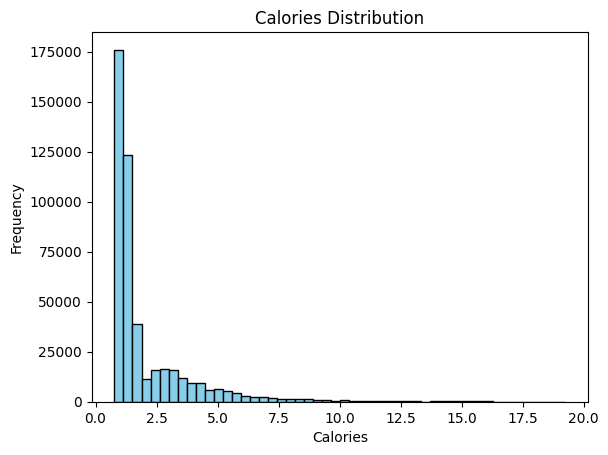

In [267]:

plt.hist(calories_merged_df['Calories'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Calories Distribution')
plt.show()

array([[<Axes: title={'center': 'Steps'}>,
        <Axes: title={'center': 'METs'}>],
       [<Axes: title={'center': 'Intensity'}>, <Axes: >]], dtype=object)

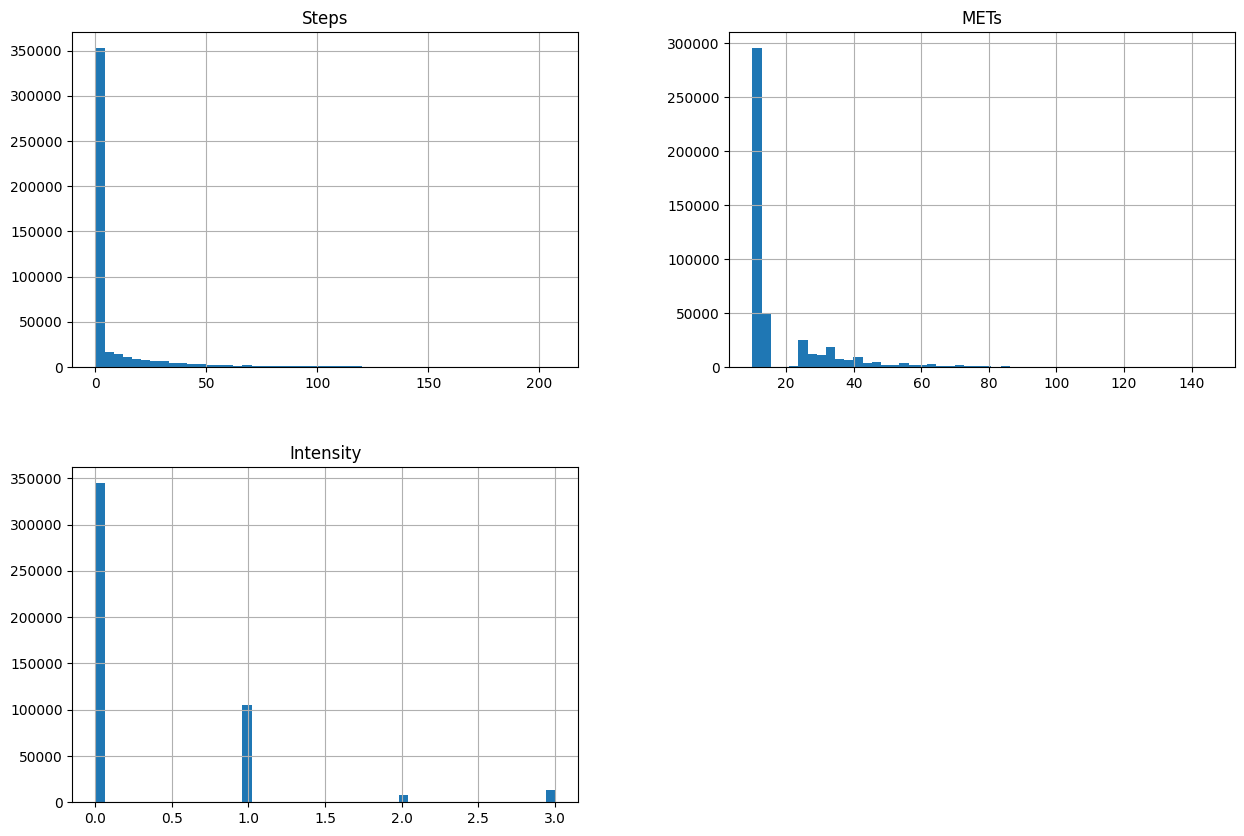

In [268]:
calories_merged_df[['Steps', 'METs', 'Intensity']].hist(bins=50, figsize=(15,10))

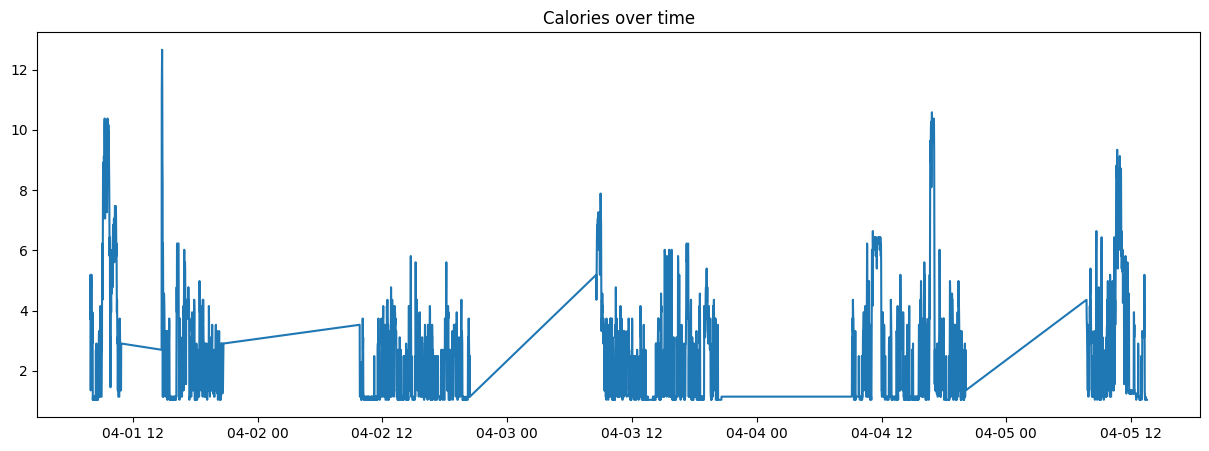

In [269]:
uid = calories_merged_df['Id'].iloc[0]

sample = (
    calories_merged_df[calories_merged_df['Id'] == uid]
        .head(2 * 24 * 60)
)
plt.figure(figsize=(15, 5))
plt.plot(sample['ActivityMinute'], sample['Calories'], label='Calories')
plt.title('Calories over time')
plt.show()

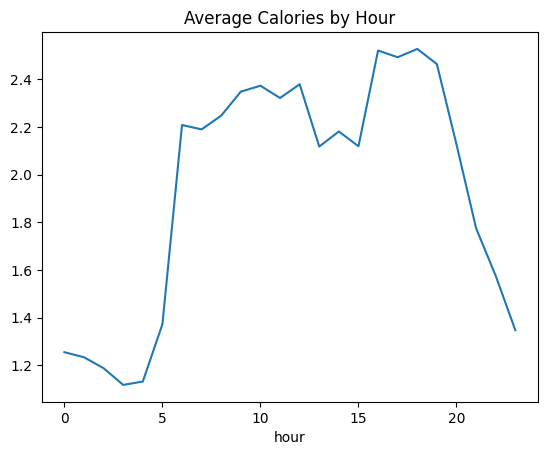

In [270]:
calories_merged_df['hour'] = calories_merged_df['ActivityMinute'].dt.hour

calories_merged_df.groupby('hour')['Calories'].mean().plot(kind='line')
plt.title('Average Calories by Hour')
plt.show()

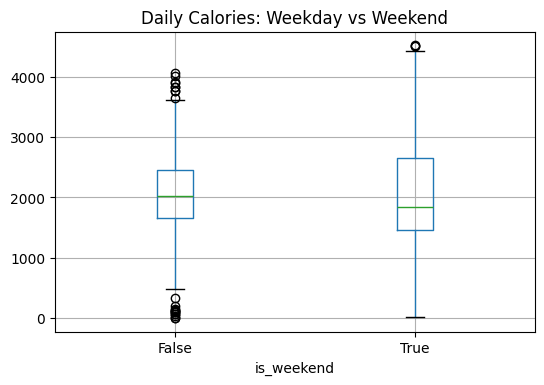

In [271]:
df = calories_merged_df.copy()

df["dayofweek"] = df["ActivityMinute"].dt.dayofweek
# Monday=0, Sunday=6
df["is_weekend"] = df["dayofweek"].isin([5, 6])

daily = (
    df.groupby(["Id", "is_weekend", df["ActivityMinute"].dt.date])["Calories"]
      .sum()
      .reset_index()
)

daily.boxplot(column="Calories", by="is_weekend", figsize=(6,4))
plt.title("Daily Calories: Weekday vs Weekend")
plt.suptitle("")
plt.show()

In [272]:
calories_merged_df[calories_merged_df['segment_id'] > 1]

,Id,ActivityMinute,Calories,Intensity,METs,Steps,min_hr,max_hr,avg_hr,minute_gap,has_gap,time_diff,new_segment,segment_id,segment_uid,hour
181,2022484408,2016-04-01 14:46:00,3,1,26,8,123,173,162,226,1,13560,True,3,2022484408_3,14
182,2022484408,2016-04-01 14:47:00,11,1,109,0,163,182,170,1,0,60,False,3,2022484408_3,14
183,2022484408,2016-04-01 14:48:00,12,1,116,9,171,180,175,1,0,60,False,3,2022484408_3,14
184,2022484408,2016-04-01 14:49:00,13,1,122,0,159,169,165,1,0,60,False,3,2022484408_3,14
185,2022484408,2016-04-01 14:50:00,11,1,110,0,141,159,151,1,0,60,False,3,2022484408_3,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471025,8877689391,2016-05-12 13:55:00,1,0,11,0,60,61,61,1,0,60,False,87,8877689391_87,13
471026,8877689391,2016-05-12 13:56:00,1,0,11,0,60,63,62,1,0,60,False,87,8877689391_87,13
471027,8877689391,2016-05-12 13:57:00,1,0,11,0,55,60,58,1,0,60,False,87,8877689391_87,13
471028,8877689391,2016-05-12 13:58:00,1,0,11,0,59,62,61,1,0,60,False,87,8877689391_87,13


#### Interpretation

**1. Calories Distribution**
From the calories distribution, we observe that most calories burned per minute fall within the range of approximately 0 to 1.5, forming a right-skewed distribution. This indicates that while most minutes involve low energy expenditure, users occasionally reach much higher calorie burn levels, likely during periods of exercise. Similarly, Steps, METs, and Intensity exhibit comparable right-skewed patterns, reflecting sporadic bursts of higher activity.

**2. Hourly Activity Pattern**
The hourly average plot shows that calorie expenditure is lowest during nighttime hours and higher during daytime, corresponding to typical human activity and rest cycles. This pattern is consistent with expected daily routines and supports the validity of the data.

**3. Weekday vs. Weekend Comparison**
The boxplot comparison shows that daily calories burned on weekends are slightly higher than on weekdays. The medians and interquartile ranges are comparable for both groups, and no obvious abnormal patterns are observed, indicating a generally consistent distribution of calorie expenditure across weekdays and weekends.



### 1.2.3 Features Correlation

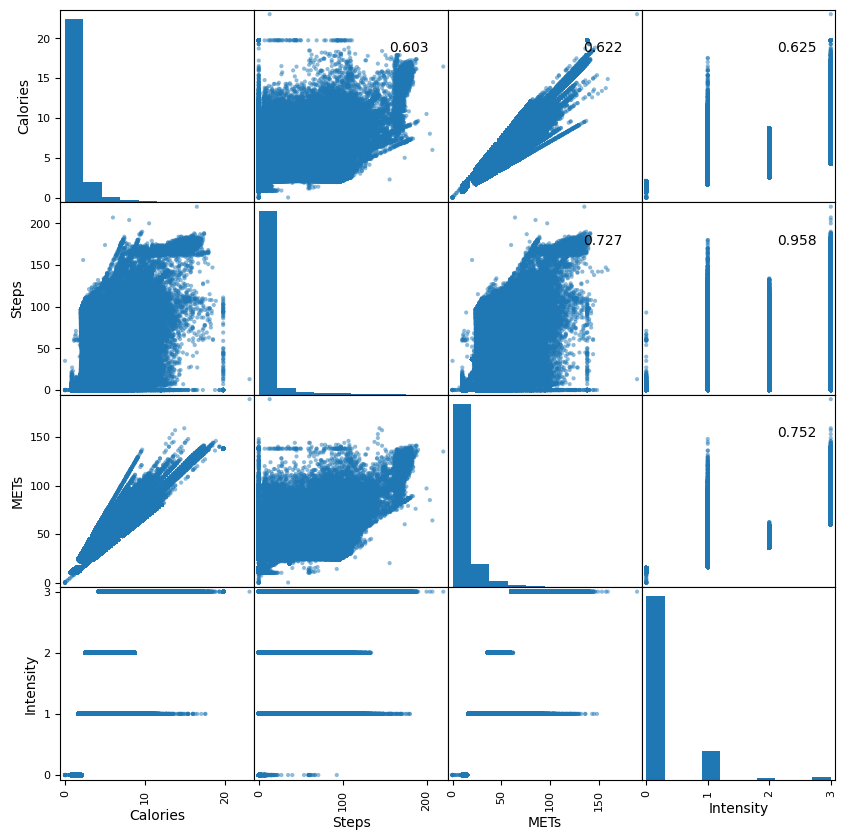

In [218]:
axes = pd.plotting.scatter_matrix(calories_merged_df[['Calories','Steps','METs','Intensity']], alpha=0.5,figsize= [10,10])
corr = calories_merged_df[['Calories','Steps','METs','Intensity']].corr(method = 'spearman').to_numpy()
#nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
  axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

plt.show()

## 1.3 Dataset for sleep status prediction



*   Merge sleep status with heart rate(min, max, avg)/Intensity/METs
*   Split into contiguous segments (per user)
*   Filter long segments




In [21]:
# ensure datetime
raw_hr_sec_df['Time'] = pd.to_datetime(raw_hr_sec_df['Time'])

# drill up to minute
raw_hr_sec_df['ActivityMinute'] = raw_hr_sec_df['Time'].dt.floor('min')

# aggregate
hr_min_df = (
    raw_hr_sec_df.groupby(['Id', 'ActivityMinute'])['Value']
      .agg(
          min_hr='min',
          max_hr='max',
          avg_hr='mean'
      )
      .reset_index()
)

In [98]:
# Merge sleep status with heart rate(min, max, avg)/Intensity/METs
raw_intensities_min_df['ActivityMinute'] = pd.to_datetime(
    raw_intensities_min_df['ActivityMinute'],
    format='%m/%d/%Y %I:%M:%S %p'
)

raw_mets_min_df['ActivityMinute'] = pd.to_datetime(
    raw_mets_min_df['ActivityMinute'],
    format='%m/%d/%Y %I:%M:%S %p'
)

raw_step_min_df['ActivityMinute'] = pd.to_datetime(
    raw_step_min_df['ActivityMinute'],
    format='%m/%d/%Y %I:%M:%S %p'
)

raw_sleep_min_df['date'] = pd.to_datetime(
    raw_sleep_min_df['date'],
    format='%m/%d/%Y %I:%M:%S %p'
)

raw_sleep_min_df['ActivityMinute'] = raw_sleep_min_df['date'].dt.floor('T')

sleep_status_df = raw_sleep_min_df.merge(
    hr_min_df,
    on=['Id', 'ActivityMinute'],
    # left_on=['Id', 'ActivityMinute'],
    how='left'
)

sleep_status_df = sleep_status_df.merge(
    raw_intensities_min_df,
    on=['Id', 'ActivityMinute'],
    how='left'
)

sleep_status_df = sleep_status_df.merge(
    raw_mets_min_df,
    on=['Id', 'ActivityMinute'],
    how='left'
)

sleep_status_df = sleep_status_df.merge(
    raw_step_min_df,
    on=['Id', 'ActivityMinute'],
    how='left'
)


/tmp/ipython-input-888302272.py:22: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  raw_sleep_min_df['ActivityMinute'] = raw_sleep_min_df['date'].dt.floor('T')


In [99]:
# Drop the 'date' and 'logId' columns as they are not needed after merging and before interpolation.
sleep_status_df.drop(columns=['date', 'logId'], inplace=True)

# drop duplicate
sleep_status_df = sleep_status_df.drop_duplicates(subset=['Id', 'ActivityMinute'])

print("NaNs before interpolation (after dropping 'date' and 'logId'):")
print(sleep_status_df.isna().sum())

NaNs before interpolation (after dropping 'date' and 'logId'):
Id                     0
value                  0
ActivityMinute         0
min_hr            273216
max_hr            273216
avg_hr            273216
Intensity           1068
METs                1068
Steps               1068
dtype: int64


In [109]:
# Columns to interpolate: Intensity, METs, Steps, and value (sleep status)
cols_to_interpolate = ['Intensity', 'METs', 'Steps']

sleep_status_df.dropna(subset=['ActivityMinute'], inplace=True)

# Ensure 'ActivityMinute' is a datetime object and sort the DataFrame
sleep_status_df['ActivityMinute'] = pd.to_datetime(sleep_status_df['ActivityMinute'])
sleep_status_df.sort_values(by=['Id', 'ActivityMinute'], inplace=True)

# covenrt restless into awake
sleep_status_df['value'] = sleep_status_df['value'].replace(3, 2)

# Temporarily set 'ActivityMinute' as the index for interpolation
sleep_status_df_indexed = sleep_status_df.set_index('ActivityMinute').copy()

for col in cols_to_interpolate:
    # Perform group-wise time-based interpolation
    sleep_status_df_indexed[col] = sleep_status_df_indexed.groupby('Id')[col].transform(
        lambda x: x.interpolate(method='time', limit=60, limit_direction='both')
    )

# Reset the index and update the original DataFrame
sleep_status_df = sleep_status_df_indexed.reset_index()

# #Drop any remaining NaNs in 'value' after interpolation (these would be large gaps)
# sleep_status_df.dropna(subset=['value'], inplace=True)
sleep_status_df.dropna(inplace=True)

print("\nNaNs after interpolating small gaps and dropping large value NaNs:")
print(sleep_status_df.isna().sum())


NaNs after interpolating small gaps and dropping large value NaNs:
ActivityMinute    0
Id                0
value             0
min_hr            0
max_hr            0
avg_hr            0
Intensity         0
METs              0
Steps             0
time_diff         0
new_segment       0
segment_id        0
segment_uid       0
dtype: int64


In [110]:
# Sort by value
sleep_status_df = sleep_status_df.sort_values(['Id', 'ActivityMinute'], ascending=True)

# Remove duplicated data
sleep_status_df = sleep_status_df.drop_duplicates(subset=['Id', 'ActivityMinute'])


# Check minute-level time continuity in the dataset
sleep_status_df.groupby('Id')['ActivityMinute'].diff().value_counts()

,count
ActivityMinute,
0 days 00:01:00,109032
0 days 00:02:00,41
0 days 00:03:00,36
0 days 00:04:00,18
0 days 00:05:00,17
...,...
0 days 18:48:00,1
0 days 15:42:00,1
0 days 15:31:00,1


In [111]:
sleep_status_df['time_diff'] = (
    sleep_status_df.groupby('Id')['ActivityMinute']
      .diff()
      .dt.total_seconds()
)

In [112]:
# Split into contiguous segments (per user)
sleep_status_df['time_diff'] = (
    sleep_status_df.groupby('Id')['ActivityMinute']
      .diff()
      .dt.total_seconds()
)

EXPECTED_INTERVAL = 60   # second
THRESHOLD = 60 * 60 * 2  # 2 hours

sleep_status_df['new_segment'] = (
    (sleep_status_df['time_diff'] > THRESHOLD) |
    sleep_status_df['time_diff'].isna()
)

sleep_status_df['segment_id'] = (
    sleep_status_df.groupby('Id')['new_segment']
      .cumsum()
)

sleep_status_df['segment_uid'] = (
    sleep_status_df['Id'].astype(str) + '_' +
    sleep_status_df['segment_id'].astype(str)
)

# Filter long segments
segment_stats = (
    sleep_status_df.groupby(['Id', 'segment_uid'])
      .agg(
          start_time=('ActivityMinute', 'min'),
          end_time=('ActivityMinute', 'max'),
          n_points=('ActivityMinute', 'count')
      )
      .reset_index()
)

segment_stats['duration_sec'] = (
    segment_stats['end_time'] - segment_stats['start_time']
).dt.total_seconds()

valid_segments = segment_stats[
    segment_stats['duration_sec'] >= THRESHOLD
]

sleep_status_merge_df = sleep_status_df.merge(
    valid_segments[['segment_uid']],
    on='segment_uid',
    how='inner'
)

In [113]:
sleep_status_merge_df.groupby('segment_uid')['ActivityMinute'].diff().value_counts().head()

,count
ActivityMinute,
0 days 00:01:00,107291
0 days 00:02:00,38
0 days 00:03:00,35
0 days 00:04:00,18
0 days 00:05:00,15


### 1.3.1 EDA

In [114]:
print(f"""
Number of users: {sleep_status_merge_df['Id'].nunique()}
Number of segments: {sleep_status_merge_df['segment_uid'].nunique()}
Number of points: {sleep_status_merge_df['ActivityMinute'].count()}

Longest segment: {sleep_status_merge_df['segment_uid'].value_counts().max() / 60} hours
Shortest segment: {sleep_status_merge_df['segment_uid'].value_counts().min() / 60} hours
Average segment: {sleep_status_merge_df['segment_uid'].value_counts().mean() / 60} hours
""")


Number of users: 11
Number of segments: 242
Number of points: 107775

Longest segment: 14.916666666666666 hours
Shortest segment: 1.5166666666666666 hours
Average segment: 7.422520661157025 hours



In [115]:
sleep_status_merge_df.describe()

,ActivityMinute,Id,value,min_hr,max_hr,avg_hr,Intensity,METs,Steps,time_diff,segment_id
count,107775,107775,107775,107775,107775,107775,107775,107775,107775,107764,107775
mean,2016-04-19 21:47:08.168684544,5644589122,1,60,63,62,0,10,0,261,18
min,2016-03-29 00:01:00,2026352035,1,37,40,39,0,10,0,60,1
25%,2016-04-09 05:20:00,4388161847,1,55,58,56,0,10,0,60,7
50%,2016-04-20 02:46:00,5577150313,1,60,63,61,0,10,0,60,16
75%,2016-04-30 01:42:00,6962181067,1,65,68,66,0,10,0,60,25
max,2016-05-12 08:00:00,8792009665,2,122,147,126,1,70,54,1539000,50
std,NaN,1712715349,0,8,9,8,0,2,1,8299,12


<Axes: xlabel='length', ylabel='Count'>

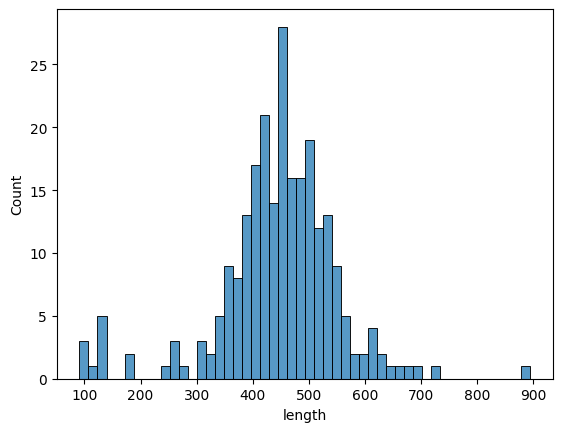

In [116]:
segment_stats = (
    sleep_status_merge_df.groupby(['Id','segment_uid'])
      .size()
      .reset_index(name='length')
)

sns.histplot(segment_stats['length'], bins=50)

In [117]:
sleep_status_merge_df['value'].value_counts().sort_index()


,count
value,
1,100963
2,6812


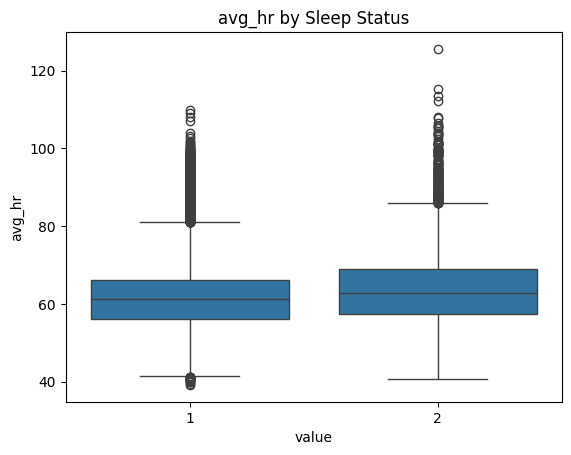

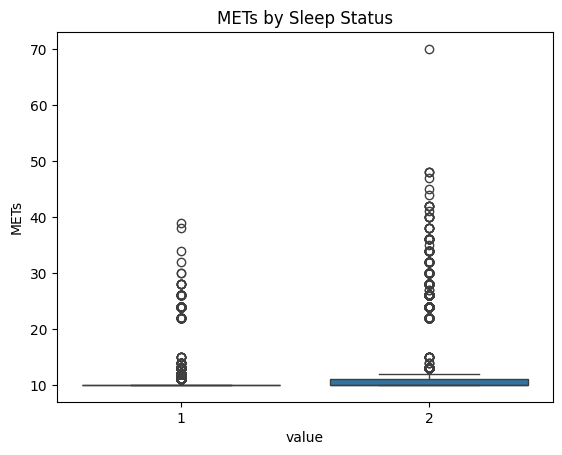

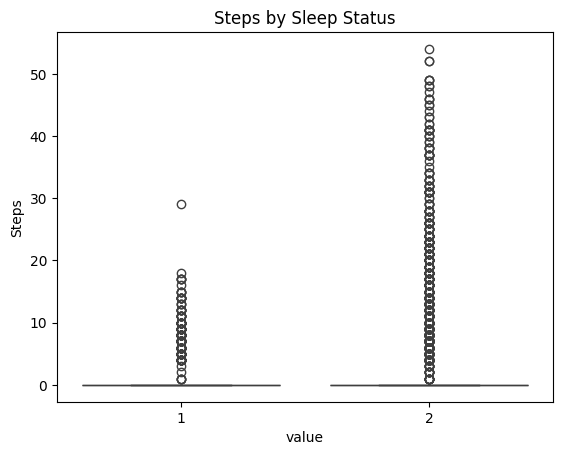

In [118]:
features = ['avg_hr', 'METs', 'Steps']

for f in features:
    sns.boxplot(
        x='value',
        y=f,
        data=sleep_status_merge_df
    )
    plt.title(f'{f} by Sleep Status')
    plt.show()

<Axes: xlabel='hour', ylabel='count'>

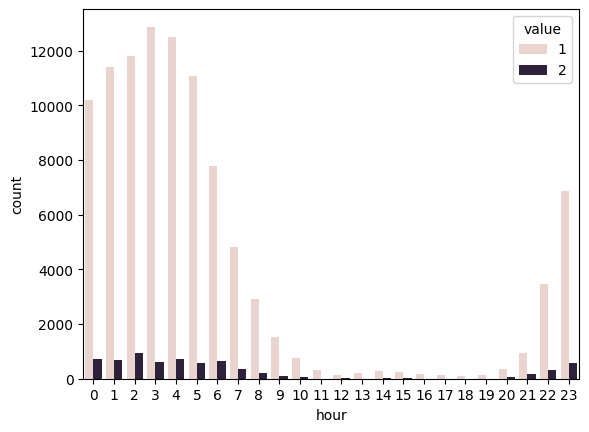

In [119]:
sleep_status_merge_df['hour'] = sleep_status_merge_df['ActivityMinute'].dt.hour

sns.countplot(
    x='hour',
    hue='value',
    data=sleep_status_merge_df
)

<Axes: xlabel='Id'>

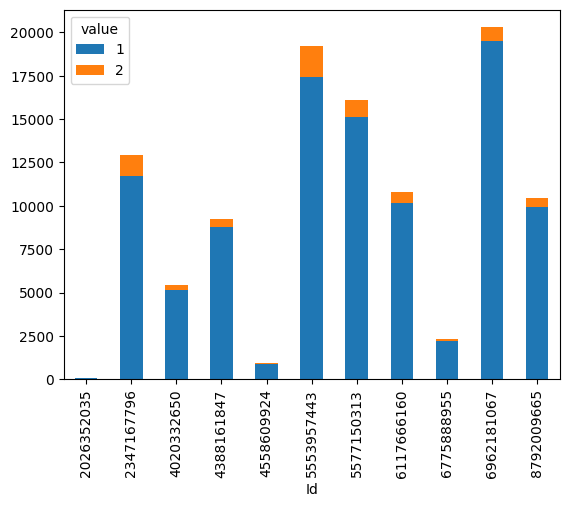

In [120]:
user_sleep_dist = (
    sleep_status_merge_df.groupby(['Id','value'])
           .size()
           .unstack(fill_value=0)
)

user_sleep_dist.plot(kind='bar', stacked=True)

#### Interpretation

In this dataset, sleep status is classified into three device-defined categories:
`1 = Asleep, 2 = Restless, and 3 = Awake`.

From the boxplots, the average heart rate during the `Asleep` state is consistently lower than in the other two states, which aligns with expected physiological patterns during sleep. In contrast, the `Awake` state exhibits significantly higher heart rates and greater variability, reflecting increased physical and mental activity. A similar trend is observed for METs, where activity intensity increases progressively from Asleep to `Awake`.

Notably, the `Restless` state shows a larger number of high-value outliers in both heart rate and `METs`. This suggests intermittent body movements, such as turning or repositioning during sleep, which are captured by wearable sensors as short bursts of activity. Correspondingly, step counts occasionally appear in both Restless and `Awake` states, likely caused by motion artifacts rather than sustained walking behavior.

Temporal distribution analysis indicates that most sleep records occur during nighttime hours, consistent with typical circadian sleep patterns. However, a non-negligible portion of sleep observations is also present during daytime, which may correspond to daytime naps or irregular sleep schedules.

Finally, user-level distributions reveal that most individuals exhibit a dominant `Asleep` state, with fewer observations in `Restless` and Awake states. This consistent pattern across users suggests stable sleep behavior and supports the generalizability of downstream sleep state modeling.





### 1.3.2 Features Correlation

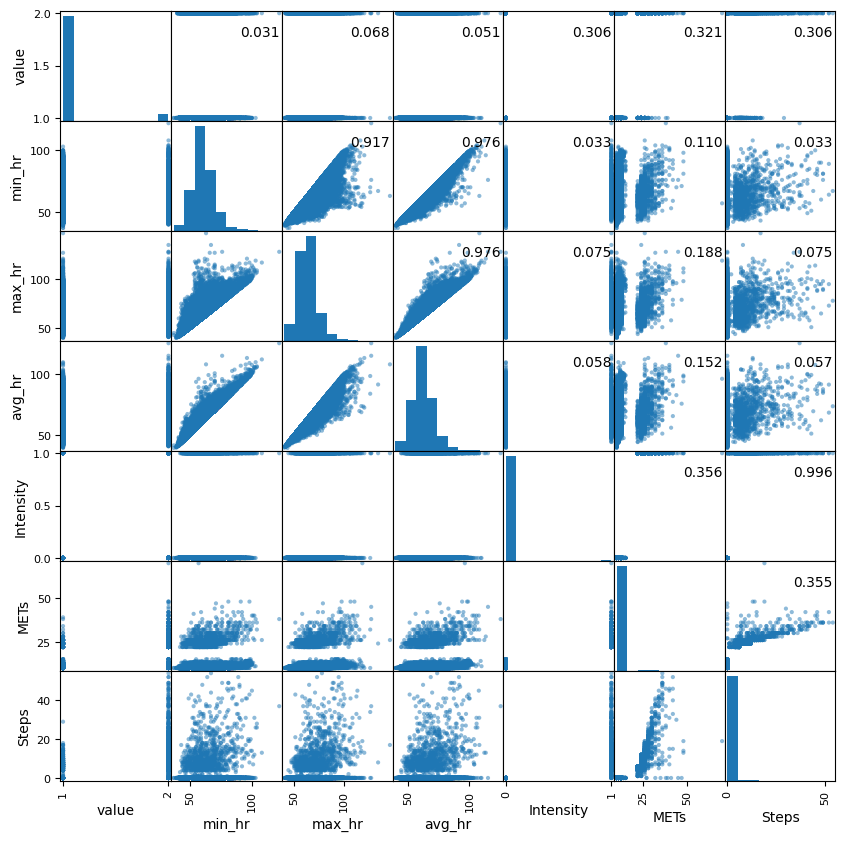

In [121]:
axes = pd.plotting.scatter_matrix(sleep_status_merge_df[['value','min_hr','max_hr','avg_hr','Intensity','METs','Steps']], alpha=0.5,figsize= [10,10])
corr = sleep_status_merge_df[['value','min_hr','max_hr','avg_hr','Intensity','METs','Steps']].corr(method = 'spearman').to_numpy()
#nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
  axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

plt.show()

## 1.4 Save cleaned datasets

In [122]:
calories_merged_df[['Id', 'ActivityMinute', 'Calories', 'Intensity', 'METs', 'Steps']]. \
      to_csv(google_drive_path + '/calories_merged_df.csv')
sleep_status_merge_df[['Id', 'ActivityMinute', 'min_hr', 'max_hr', 'avg_hr', 'Intensity', 'METs', 'Steps', 'value', 'segment_uid']]. \
      to_csv(google_drive_path + '/sleep_status_merge_df.csv')

In [38]:
# load cleaned dataset

# calories_merged_df = pd.read_csv(google_drive_path + '/calories_merged_df.csv')
# sleep_status_merge_df = pd.read_csv(google_drive_path + '/sleep_status_merge_df.csv')
# sleep_status_merge_df

# 2. Model traning

In [327]:
# import dependences
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [304]:
# Prepare data with segment awareness
df = calories_merged_df[calories_merged_df['segment_id'] > 1].copy()
df = df.sort_values(['segment_uid', 'ActivityMinute'])  # Ensure proper ordering

In [352]:
def create_sequences_by_segment(df, features, target, seq_length):
    """
    Create sequences that respect segment boundaries.
    Sequences will NOT cross segment boundaries.
    """
    X_sequences = []
    y_sequences = []
    segment_ids = []

    # Group by segment_uid to process each segment separately
    for segment_uid, group in df.groupby('segment_uid'):
        group = group.sort_values('ActivityMinute').reset_index(drop=True)

        # Only create sequences if segment is long enough
        if len(group) >= seq_length + 1:
            X_data = group[features].values
            y_data = group[target].values

            # Create sequences within this segment
            for i in range(len(group) - seq_length):
                X_sequences.append(X_data[i:(i + seq_length)])
                y_sequences.append(y_data[i + seq_length])
                segment_ids.append(segment_uid)

    return np.array(X_sequences), np.array(y_sequences), np.array(segment_ids)

In [356]:
df['step_category'] = pd.cut(df['Steps'],
                              bins=[0, 10, 100, 1000],
                              labels=[0, 1, 2])

In [357]:
# Define features and target
target = 'step_category'
sequence_length = 10  # Use 10 minutes to predict the next minute
features = [
    'Intensity',
    'METs',
    'hour',  # Time of day matters for step patterns
    # Lag features (previous minute's steps)
    'steps_lag_1',
    'steps_lag_2',
    'steps_lag_3',
    # Rolling statistics
    'steps_rolling_mean_5',
    'steps_rolling_std_5',
    'intensity_rolling_mean_3',
    'mets_rolling_mean_3',
    # HR
    'min_hr',
    'max_hr',
    'avg_hr',
    'hr_rolling_mean_5',
    'hr_rolling_std_5',
]

# Create lag features within segments
def add_temporal_features(df):
    df = df.sort_values(['segment_uid', 'ActivityMinute']).copy()

    # Add hour from ActivityHour
    df['hour'] = pd.to_datetime(df['ActivityMinute']).dt.hour

    # Lag features (within segments only)
    for lag in [1, 2, 3]:
        df[f'steps_lag_{lag}'] = df.groupby('segment_uid')['Steps'].shift(lag)

    # Rolling features (within segments only)
    df['steps_rolling_mean_5'] = df.groupby('segment_uid')['Steps'].transform(
        lambda x: x.rolling(window=5, min_periods=1).mean()
    )
    df['steps_rolling_std_5'] = df.groupby('segment_uid')['Steps'].transform(
        lambda x: x.rolling(window=5, min_periods=1).std()
    )
    df['intensity_rolling_mean_3'] = df.groupby('segment_uid')['Intensity'].transform(
        lambda x: x.rolling(window=3, min_periods=1).mean()
    )
    df['mets_rolling_mean_3'] = df.groupby('segment_uid')['METs'].transform(
        lambda x: x.rolling(window=3, min_periods=1).mean()
    )

    df['hr_rolling_mean_5'] = df.groupby('segment_uid')['avg_hr'].transform(
        lambda x: x.rolling(window=5, min_periods=1).mean()
    )
    df['hr_rolling_std_5'] = df.groupby('segment_uid')['avg_hr'].transform(
        lambda x: x.rolling(window=5, min_periods=1).std()
    )

    # Fill NaN values created by lag/rolling
    df = df.fillna(0)

    return df

df = add_temporal_features(df)

In [358]:
# Create sequences respecting segment boundaries
X_seq, y_seq, seg_ids = create_sequences_by_segment(
    df, features, target, sequence_length
)

print(f"Created {len(X_seq)} sequences from {df['segment_uid'].nunique()} segments")
print(f"Sequence shape: {X_seq.shape}")  # (num_sequences, seq_length, num_features)

num_classes = 3
y_seq_categorical = keras.utils.to_categorical(y_seq, num_classes=num_classes)

Created 450323 sequences from 1152 segments
Sequence shape: (450323, 10, 15)


In [359]:
# Split by segment to avoid data leakage
# Get unique segments
unique_segments = np.unique(seg_ids)
train_segments, test_segments = train_test_split(
    unique_segments, test_size=0.2, random_state=42
)

In [360]:
# Create train/test split based on segments
train_mask = np.isin(seg_ids, train_segments)
test_mask = np.isin(seg_ids, test_segments)

X_train = X_seq[train_mask]
y_train = y_seq_categorical[train_mask]
X_test = X_seq[test_mask]
y_test = y_seq_categorical[test_mask]
y_test_labels = y_seq[test_mask]  # Keep original labels for evaluation

print(f"\nTrain sequences: {len(X_train)}")
print(f"Test sequences: {len(X_test)}")
print(f"Train segments: {len(train_segments)}")
print(f"Test segments: {len(test_segments)}")



Train sequences: 360815
Test sequences: 89508
Train segments: 755
Test segments: 189


In [361]:
# Scale features
# Reshape for scaling: (samples * timesteps, features)
n_samples, n_timesteps, n_features = X_train.shape
X_train_reshaped = X_train.reshape(-1, n_features)
X_test_reshaped = X_test.reshape(-1, n_features)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

X_train_scaled = X_train_scaled.reshape(n_samples, n_timesteps, n_features)
X_test_scaled = X_test_scaled.reshape(-1, n_timesteps, n_features)

print(f"\nTrain shape: {X_train_scaled.shape}")
print(f"Test shape: {X_test_scaled.shape}")
print(f"Number of classes: {num_classes}")



Train shape: (360815, 10, 15)
Test shape: (89508, 10, 15)
Number of classes: 3


In [ ]:
# Build LSTM model with segment awareness
model = keras.Sequential([
    # First LSTM layer
    layers.LSTM(256, activation='tanh', return_sequences=True,
                input_shape=(sequence_length, len(features))),
    layers.Dropout(0.2),  # Reduced dropout

    # Second LSTM layer
    layers.LSTM(128, activation='tanh', return_sequences=True),
    layers.Dropout(0.2),

    # Second LSTM layer
    layers.LSTM(64, activation='tanh', return_sequences=False),
    layers.Dropout(0.2),

    # Dense layer
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.1),

    # Output layer
    layers.Dense(num_classes, activation='softmax')  # softmax for multi-class
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',  # categorical cross-entropy loss
    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
)

model.summary()

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor='val_accuracy',  # Monitor accuracy instead of loss
            patience=10,
            restore_best_weights=True,
            mode='max'
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=1e-6
        )
    ],
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_51 (LSTM)                  │ (None, 10, 256)        │       278,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_71 (Dropout)            │ (None, 10, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_52 (LSTM)                  │ (None, 10, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_72 (Dropout)            │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_53 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_73 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_74 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 527,235 (2.01 MB)

 Trainable params: 527,235 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
4511/4511 ━━━━━━━━━━━━━━━━━━━━ 45s 9ms/step - accuracy: 0.8636 - loss: 0.3209 - precision_7: 0.8718 - recall_7: 0.8518 - val_accuracy: 0.8668 - val_loss: 0.3184 - val_precision_7: 0.8678 - val_recall_7: 0.8657 - learning_rate: 0.0010
Epoch 2/100
1117/4511 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - accuracy: 0.8839 - loss: 0.2737 - precision_7: 0.8847 - recall_7: 0.8825

In [ ]:
# Evaluate
y_pred_proba = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred_proba, axis=1)

print("\n=== Model Performance ===")
print(f"Test Accuracy: {accuracy_score(y_test_labels, y_pred_classes):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_classes,
                          target_names=['Stationary', 'Light', 'Active']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_classes))

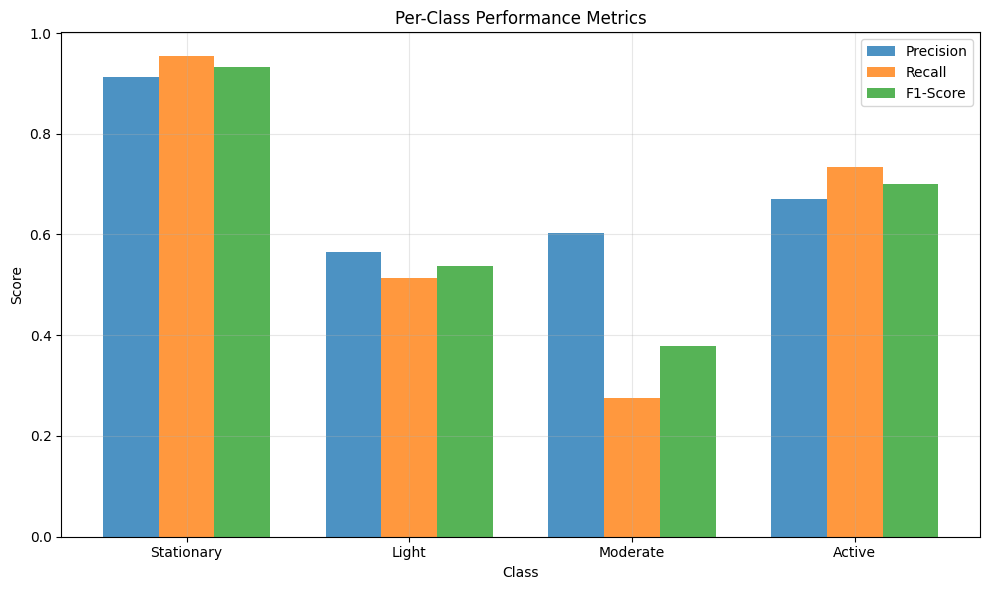

In [348]:
# Plot training history
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(
    y_test_labels, y_pred_classes
)

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(num_classes)
width = 0.25

ax.bar(x - width, precision, width, label='Precision', alpha=0.8)
ax.bar(x, recall, width, label='Recall', alpha=0.8)
ax.bar(x + width, f1, width, label='F1-Score', alpha=0.8)

ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Per-Class Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(['Stationary', 'Light', 'Moderate', 'Active'])
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

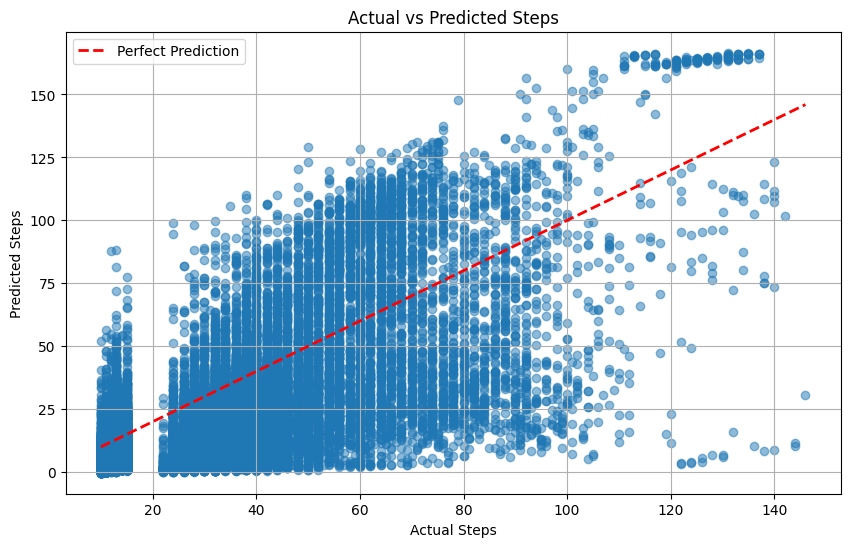

In [302]:
# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Steps')
plt.ylabel('Predicted Steps')
plt.title('Actual vs Predicted Steps')
plt.legend()
plt.grid(True)
plt.show()